In [1]:
# !pip3 install scikit-learn termcolor

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as skl
from termcolor import colored
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.gaussian_process import GaussianProcessClassifier

# Classification

Suppose we have a set of objects, described by their features $x^{(k)}$, and labels $l^{(k)}$ assigned to the objects.
Doing statistical classification we find the rule $f$ that maps $x^{(k)}$ to $l^{(k)}$ and generalize the rule to all possible objects.
For example, given samples of handwritten digits, problem of statistical classification is to assign the correct digit to an arbitrary character.

From mathematical point of view, the classifier $f$ is a mapping from the vector space $\mathbb R^N$ of all features $x$  to the vector space $\mathbb R^M$ of scores $p$, where $N$ is the number of features, and $M$ is the number of classes. In the simplest case the output of the classifier can be the class/label $l$ itself, but usage of scores instead of labels have several benefits: (1) the score shows confidence in the result, (2) scores are differentiable what is a desirable property for machine learning, (3) cross-entropy loss function can be used. 
It is convenient to consider score $p_l$ as the probability of $x$ to belong to the class $l$, therefore $p$ should be properly normalized: 
$p_l\geq 0$, $\sum_l p_l=1$.

In ML the classifier $f(\cdot|\theta)$ is taken from a predefined set, chosen to match known properties of the problem. 
Then the parameters $\theta$ of the classifier are tuned to match the training set $x^{train,k}$, $p^{train,k}$ in the best possible way.
Two method are most popular for training the classifier: (1) point estimation of $\theta$, e.g. maximum likelyhood method, and (2) Bayesian inference capable of estimation of probability distribution of $\theta$.

## Point estimation

Suppose $f(x|\theta)=p$ is the probability destribution of $x$ to belong to each class for specified parameters $\theta$ pf the classifier.
If the exact distribution is known, denote it by $\hat p(x)$, than the performance of the classifier can be estimated by the cross entropy function:
$$
H(p,\hat p)=-\sum_l p_l\log \hat p(x)_l.
$$
In applications the distribution is rarely known, instead samples $l^{k}$ of $p(x)$ are known.
In the case the cross entropy can be estimated by the following statistics:
$$
H(p,\hat p)\approx -S^{-1}\sum_k \log \hat p(x)_{l^{(k)}},
$$ 
where $S$ is total number of samples.
To estimate the performance of the estimate $\theta$ on all objects $x$, 
an averaging over all $x$ is applied, 
$$
E_x[H|\theta]\approx L[x,y|\theta]=-S^{-1}\sum_k \log \hat p(x^{(k)})_{l^{(k)}}. 
$$
The training of the classifier is just minimizati
on of the loss function on the training set:
$$
\hat\theta = \mathrm{argmin}_\theta L[x^{train,k}|\theta), y^{train,k}|\theta].
$$



One of the simplest classifiers is linear classifier. Assume that there are only two possible classes for $x$ to belong to. 
Than the distribution $p$ is defined by the single value $p_0\in[0,1]$ defining the probability of $x$ to belong to the class $0$.
The linear classifier assumes that classes are separated by a hyperplane, therefore the score is computed by:
$$
p_0(x|\theta)=f(x\cdot\theta)=f(\sum_j x_j \theta_j),
$$
where common choice for the activatio function $f$ are step function and logistic function:
$$
f(a)=(1+e^{-x})^{-1}.
$$
Applying a fixed non-linear tranform $T$ to the points $x$ before evaluation of the inner product,
$$
p_0(x|\theta)=f(T(x)\cdot\theta)=f(\sum_j T(x)_j \theta_j),
$$
effectively transforms the dividing hyperplane to arbitrary complex hypersurface, 
thus hugely increasing class of the problems solvable by the linear regression.
The transform $T$ can even map every element $x$ to several features, e.g. polynomial basis,
allowing reconstruction of almost arbitrary dependence in data.
Increasing number of features can potentialy significantly slow down computation,
but [kernel trick](https://en.wikipedia.org/wiki/Kernel_method) can be used to even infinite number of features without overhead.




## Bayesian estimator

Point estimation works well if lot of training data is available.
If training data is scare, then point estimation will be obtained most probably with large error,
resulting in bad performance of the ML algorithm.
Instead of single value of parameters $\theta$, we can consider probability distribution of $\theta$,
which incorporate our uncertanity in the parameters estimation.
We expect that the distribution tends to [one-point distribution](https://en.wikipedia.org/wiki/Degenerate_distribution)
as number of processed samples increases.

To use a Bayesian estimator, an apriory assumtion on the distribution of parameters is required.
If no initial information is available, the distribution can be set uniform.
The parameter now is assumed to be random value $\Theta$, which is described by its probability density $\rho(\Theta=\cdot)$.
For every given $\theta=\Theta$ the probability of $x$ to belong to class $c$ is given by an ansatz 
$$
P(x\in c|\Theta=\theta)=p(x)_c.
$$
Probability to sample several specific smaples $x^{(1)},\ldots,x^{(s)}$ is obtained as product of 
the propability of each individual sample:
$$
P(x^{(1)}\in c_1,\ldots,x^{(S)}\in c_S|\Theta=\theta)=p(x^{(1)})_1\cdots p(x^{(S)})_S.
$$
If we face with the observed samples, we can re-estimate the distribution of $\Theta$ by [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem):
$$
\rho(\Theta=\theta|x^{(1)}\in c_1,\ldots,x^{(S)}\in c_S)=\frac{P(x^{(1)}\in c_1,\ldots,x^{(S)}\in c_S|\Theta=\theta)\rho(\Theta=\theta)}{P(x^{(1)}\in c_1,\ldots,x^{(S)}\in c_S)}.
$$
The value in the denominator is used only for normalization, hence can be ignored under re-estimation of $\Theta$.

If the parameter $\theta$ is not known for sure, the distribution of the object $x$ over classes can be predicted
taking into account the uncertainty by [Law of total probability](https://en.wikipedia.org/wiki/Law_of_total_probability):
$$
P(x^{(S+1)}\in c_{S+1}|x^{(1)}\in c_1,\ldots,x^{(S)}\in c_S)
=\int_{\mathbb R}P(x^{(S+1)}\in c_{S+1}|\Theta=\theta)\rho(\Theta=\theta|x^{(1)}\in c_1,\ldots,x^{(S)}\in c_S)d\theta.
$$

As an example consider estimation of the parameter $\theta$ for classification problem with two classes,
assuming that the probability distribution over classes is the same for all objects $x$.
In the case any $x$ belongs to class $0$ with probability $\theta$ and to the class $1$ with probability $1-\theta$.
From mathematical point of view the problem is equivalent to estimation of probability of a coin to draw head. 
Suppose we have tossed coin $S$ times and sampled outcomes $x^{(1)},\ldots,x^{(S)}$,
each outcome is either $0$ or $1$.
Since all flipps are independed and have the same distribution, 
the number $W$ of tails is sufficient to find probability of the outcome:
$$
W=\#\{x^{(s)}=0,s\in 0\ldots S\}.
$$
The random value $W$ is distributed according to [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution):
$$
P(W=k)=C_S^k \theta^k (1-\theta)^{S-k}.
$$

Suppose we believe that odds of head and tail are even, that is $\theta=\frac12$.
We admit small violations of symmetry of the coin, then we say that tail probabilty is a random value $\Theta$
distributed in the interval $[0,1]$ according to [beta-dsitribution](https://en.wikipedia.org/wiki/Beta_distribution) with parameters $\alpha=\beta$
(in the case mode, median and mean of $\Theta$ equal $\frac12$).
The variance of $\Theta$ (expressing fluctuation from the even odds) can be controlled by the value of $\alpha$.
For example, $\alpha=1$ corresponds to the deviation:
$$
\sigma(\Theta)=\frac{1}{2\sqrt{2\alpha+1}}=\frac{1}{\sqrt{12}}\approx 29\%.
$$
To improve the estimation for $\theta$, we have made $S$ trials and counted number of heads $W$.
Probability of the outcome $W=k$ for a fixed $\theta$ is given by the binomial distribution:
$$P(W=k|\Theta=\theta)=C_S^k\theta^k(1-\theta)^{S-k}.$$
Bayes' theorem allows us swap the condition and the conlusion, thus re-estimating distribution for $\Theta$ taking into account rate of head in the trials:
$$\rho(\Theta=\theta|W=k) = \frac{P(W=k|\Theta=\theta)\rho(\Theta=\theta)}{P(W=k)},$$
where we use probability density $\rho$ for continuous variables and probabilty $P$ for the discrete ones.
To find the value in the denominator, we have to integrate over all hipothesis by law of total probability:
$$
P(W=k)=\int_{-\infty}^{\infty}P(W=k|\Theta=\theta)\rho(\Theta=\theta)d\theta
=\frac{C_S^k}{B(\alpha,\beta)}\int_{-\infty}^{\infty}\theta^{\alpha-1}(1-\theta)^{\beta-1}
\theta^{k}(1-\theta)^{S-k}d\theta. 
$$
The denominator is required for correct normalization of the probability distribution,
but it can be neglected under estimation of the distribution parameters.
Taking into account new data, the probability density for $\theta$ takes the following form:
$$
P(W=k|\Theta=\theta)=\mathrm{const}\cdot \theta^{k+\alpha-1}(1-\theta)^{S-k+\beta-1}.
$$
Hence the random value $\Theta$ after the re-estimation still can be described by beta-distribution with new parameters:
$$
\alpha\mapsto \alpha'=\alpha+k,\quad
\beta\mapsto \beta'=\beta+S-k.
$$
The most probable value of $\theta$ now:
$$
\theta=\frac{\alpha'-1}{\alpha'+\beta'-2}
=\frac{\alpha+k-1}{\alpha+k+\beta+N-k-2}
=\frac{\alpha+k-1}{2\alpha+N-2}.
$$
It is worth noting that our apriory assumtion of the distribution of $\Theta$ does contribute to the final answer.
Even under assumption that odds are even, our confidence in the assumption (value of $\alpha$) determines 
how strong new data affects the result.
In particular, if $\alpha=1$, the Bayes' estimator gives the same result as maximum likelihood estimation and statistical interpretation of probability.

## Performance metrics

Performance of the classifier can be estimated using [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) 
and derived metrics such as [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall) for binary classifiers.
The metrics can be misleading, if the data is unbalanced, that is if numbers of postive and negative cases are significantly different. 

If a classifier returns score for each class, than boundary between classes are determined by the threshold value. 
The best possible value can be estimated from [Receiver operating characteristic (ROC) curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic),
which is dependence of true positive cases on false positive. 
The best threshold corresponds to upper left point on the plot.
The area under the ROC curve is also used to compare different classifiers.


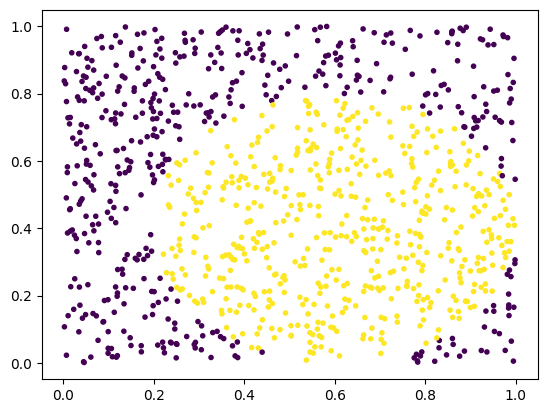

In [3]:
def visualize(x=None, y=None, y_predicted=None, axis=None):
    nitems = x.shape[0]
    assert y.shape == (nitems,)    
    assert x.ndim == 2 

    if y_predicted is not None:
        assert y_predicted.shape == y.shape
        wrong_predictions = y!=y_predicted
    else:
        wrong_predictions = slice(0)
    
    if axis is None:
        _fig, axis = plt.subplots()
        
    if x.shape[1] == 2: # Scatter plot vizualization
        axis.scatter(x=x[wrong_predictions,0], y=x[wrong_predictions,1], c='r', marker=',')
        axis.scatter(x=x[:,0], y=x[:,1], c=y, marker='.')
    else: # Function plot
        axis.plot(x[wrong_predictions,:], c='r', linestyle='solid', linewidth=3)
        axis.plot(x[y==0,:].T, c='y', linestyle='solid')
        axis.plot(x[y==1,:].T, c='b', linestyle='solid')        
        
        

class TestProblem:
    def sample(self, nitems: int) -> (np.ndarray, np.ndarray):
        raise NotImplementedError

    def visualize(self, nitems=1000, axis=None):
        x, y = self.sample(nitems=nitems)
        visualize(x=x, y=y, axis=axis)

class CircleProblem(TestProblem):
    def __init__(self, center: np.ndarray, radius: float):
        self._center = np.array(center)
        assert self._center.ndim == 1
        self._radius = np.float32(radius)

    def sample(self, nitems):
        x = np.random.rand(nitems, self._center.shape[0])
        distance_to_the_center = np.linalg.norm(x-self._center[None], ord=2, axis=-1)
        y = distance_to_the_center<self._radius
        return x, y

problem = CircleProblem(center=(0.6, 0.4), radius=0.4)
problem.visualize()
plt.show()



In [4]:
from sklearn import metrics

def confusion_matrix(y, y_predicted):
    mx = np.maximum(np.max(y),np.max(y_predicted))
    confusion_matrix = np.zeros((mx+1, mx+1), dtype=np.int32)
    for r, c in zip(y,y_predicted):
        confusion_matrix[r,c] += 1
    return confusion_matrix

def print_metrics(y, y_predicted):
    y = np.array(y, dtype=np.int8)
    y_predicted = np.array(y_predicted, dtype=np.int8)
    
    cm = confusion_matrix(y,y_predicted)
    print(f"Confusion matrix:\n", cm)

    if cm.shape[0]==2:
        (TP, FN), (FP, TN) = cm
        recall = TP/(TP+FN)
        precision = TP/(TP+FP)
        f1 = 2*TP/(2*TP+FP+FN)
        print(f"Recall {100*recall:.2f}%, precision {100*precision:.2f}%, f1-measure {100*f1:.2f}%")

def benchmark_classifier(clf, problem, trainx_in,trainy_in, testx_in, testy_in, k_mean = False, n_training_samples=1000, n_test_samples=100):
    training_x, training_y = trainx_in, trainy_in
    test_x, test_y = testx_in, testy_in

    clf.fit(training_x, training_y)

    y_predicted = clf.predict(training_x)
    y_predicted_test = clf.predict(test_x)

    print(colored("Training data:","yellow"))
    print_metrics(training_y, y_predicted)

    print("Test data:")
    print_metrics(test_y, y_predicted_test)


    fig, (axis1, axis2, axis3) = plt.subplots(ncols=3, figsize=(15, 5))

    visualize(training_x, training_y, y_predicted, axis=axis1)
    axis1.set_title('Training set')

    visualize(test_x, test_y, y_predicted_test, axis=axis2)
    axis2.set_title('Test set')

    if not k_mean:
        scores = clf.decision_function(test_x)
        fpr, tpr, thresholds = metrics.roc_curve(test_y, scores)
    else:
        fpr, tpr, thresholds = metrics.roc_curve(test_y, y_predicted_test)
    axis3.plot(fpr, tpr)
    axis3.set_title('Receiver operating characteristic')

    plt.show()

## Problems:

1. `CircleProblem` above is an example of complete separation problem, that is a unique class is assigned deterministically to every features vector. In many cases however the boundary between the classes are blured or the classes overlap. That means that in general only probability distribution of the classes can be defined. 
As an example, consider a test binary classification problem `GaussProblem`, such that an object described by a vector from $\mathbb R^N$ belongs to the first (positives) class with the probability defined by the [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution). The class of every object in the training/test is uniquely defined, despite the fact that the same object can belong to different classes on multiple occurances in the set. Define a class implementing the problem settings.

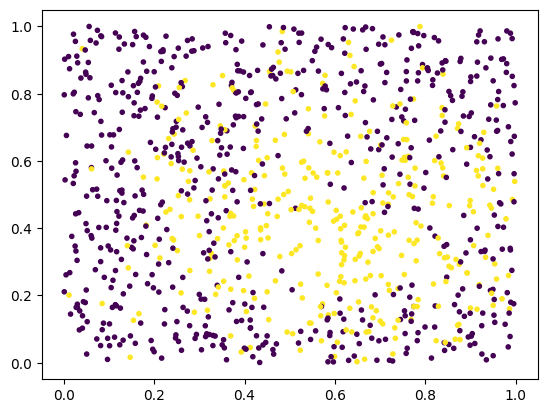

In [5]:
class GaussProblem(TestProblem):
    def __init__(self, center: np.ndarray, radius: float):
        self._center = np.array(center)
        assert self._center.ndim == 1
        self._radius = np.float32(radius)
        
    def score(self, points):
        assert points.ndim==2 and points.shape[1]==self._center.shape[0]
        distance_to_center_squared = np.sum( (points-self._center[None])**2, axis=-1)
        return np.exp(-distance_to_center_squared/(2*self._radius**2))

    def sample(self, nitems):
        x = np.random.rand(nitems, self._center.shape[0])
        zero_class_probability = self.score(x)
        y = np.random.rand(nitems)<=zero_class_probability
        return x, y

problem = GaussProblem(center=(0.6, 0.4), radius=0.25)
problem.visualize()
plt.show()

2. Boundary between the classes in `GaussProblem` is blured in contrast to `CircleProblem`. How does the bluring affect classification metrics?

3. Check parameters of the classifiers and tune them to avoid overfitting.

4. Compare classifiers [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) impl, [k-nearest neighbors algorithm
](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm), 
[`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) impl. [support-vector_machine](https://en.wikipedia.org/wiki/Support-vector_machine) with different kernels, 
[`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) impl. [random forest method](https://ru.wikipedia.org/wiki/Random_forest)
from sklearn on `GaussProblem`, you may found usefull [this example](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). Explain difference in the performance of the classifiers. Increase dimensionality of the features space, do you see any effects of [curse of dimensionality?](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

5. Explain what is [ensemble learning](https://en.wikipedia.org/wiki/Ensemble_learning)? What is [boosting](https://en.wikipedia.org/wiki/Boosting_(machine_learning))?

6. Make you own implementation of [linear classifier](https://en.wikipedia.org/wiki/Linear_classifier) providing the same API as sklearn. Consider using [autograd](https://github.com/HIPS/autograd) to compute derivatives and [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to train the model. Try to implement [kernel trick](https://en.wikipedia.org/wiki/Kernel_method).

7. Implement a [Bayes estimator](https://en.wikipedia.org/wiki/Bayes_estimator) as descibed above, and estimate the parameter of the [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution). Can you find parameters of 2D `GaussProblem` using the estimator?.

8. Derive class `FunctionProblem` from `TestProblem` that generates plots of functions from two classes: 
(I) $f(t)=A\cdot\sin(B\cdot t+C)$, (II) $f(t)=D\cdot t+E$.
Both classes must appear in the generated samples with the same rate 50%.
The coefficients $A,B,C,D,E$ are random, uniformly distributed in the sets:
$$A\in[-3,3],\quad B\in[0,2\pi],\quad C\in[0,1],\quad D\in[-2,2],\quad E\in[-1,1].$$
The function plot is represented by the vector of the values $f(t_k)$ where $t_k=\frac{k}{N}-\frac{1}{2}$, $k=0..N$, $N=100$.  
Do you best to make a good classifier for `FunctionProblem` (you can use `sklearn` or any library of your choice). 

9. Select [important features](https://en.wikipedia.org/wiki/Feature_selection) used by the classifier for `FunctionProblem`. Apply the [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) and visualize the result. Try to eliminate all features except of the important ones, and check performance of the classifier on the important features. Can you explain, how the classifier decides which class an example belongs to?

2. Boundary between the classes in `GaussProblem` is blured in contrast to `CircleProblem`. How does the bluring affect classification metrics?

3. Check parameters of the classifiers and tune them to avoid overfitting.

4. Compare classifiers [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) impl, [k-nearest neighbors algorithm
](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm),
[`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) impl. [support-vector_machine](https://en.wikipedia.org/wiki/Support-vector_machine) with different kernels,
[`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) impl. [random forest method](https://ru.wikipedia.org/wiki/Random_forest)
from sklearn on `GaussProblem`, you may found usefull [this example](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html). Explain difference in the performance of the classifiers.

5. Derive class `EllipseProblem` from `TestProblem` that generates plots of Ellipse. Increase dimensionality of the features space and use `KNeighborsClassifier`, do you see any effects of [curse of dimensionality?](https://en.wikipedia.org/wiki/Curse_of_dimensionality)

6. Select [important features](https://en.wikipedia.org/wiki/Feature_selection) used by the classifier for `FunctionProblem`. Apply the [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) and visualize the result. Try to eliminate all features except of the important ones, and check performance of the classifier on the important features. Can you explain, how the classifier decides which class an example belongs to?

Training data:
Confusion matrix:
 [[584  92]
 [111 213]]
Recall 86.39%, precision 84.03%, f1-measure 85.19%
Test data:
Confusion matrix:
 [[60  8]
 [10 22]]
Recall 88.24%, precision 85.71%, f1-measure 86.96%


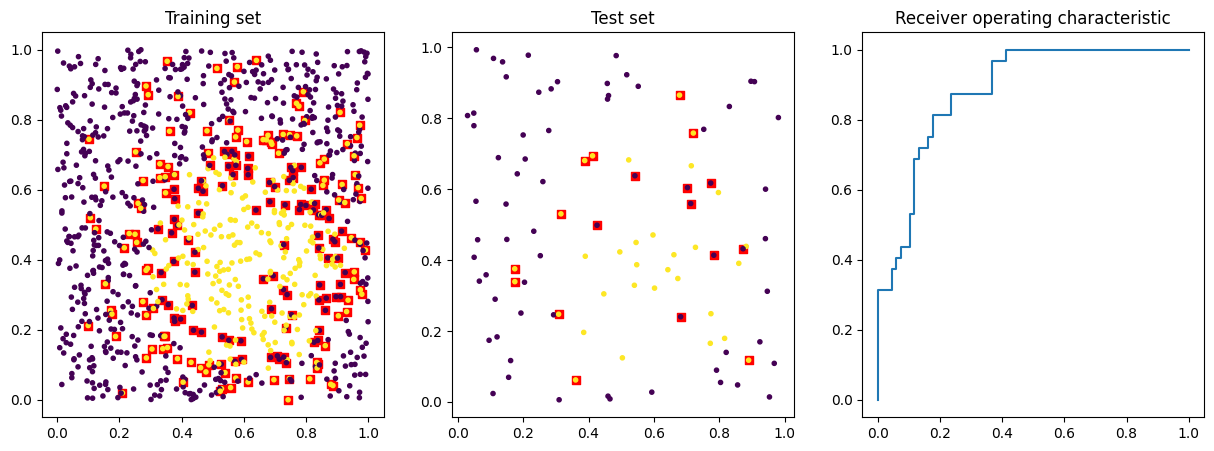

Training data:
Confusion matrix:
 [[600  76]
 [124 200]]
Recall 88.76%, precision 82.87%, f1-measure 85.71%
Test data:
Confusion matrix:
 [[59  9]
 [13 19]]
Recall 86.76%, precision 81.94%, f1-measure 84.29%


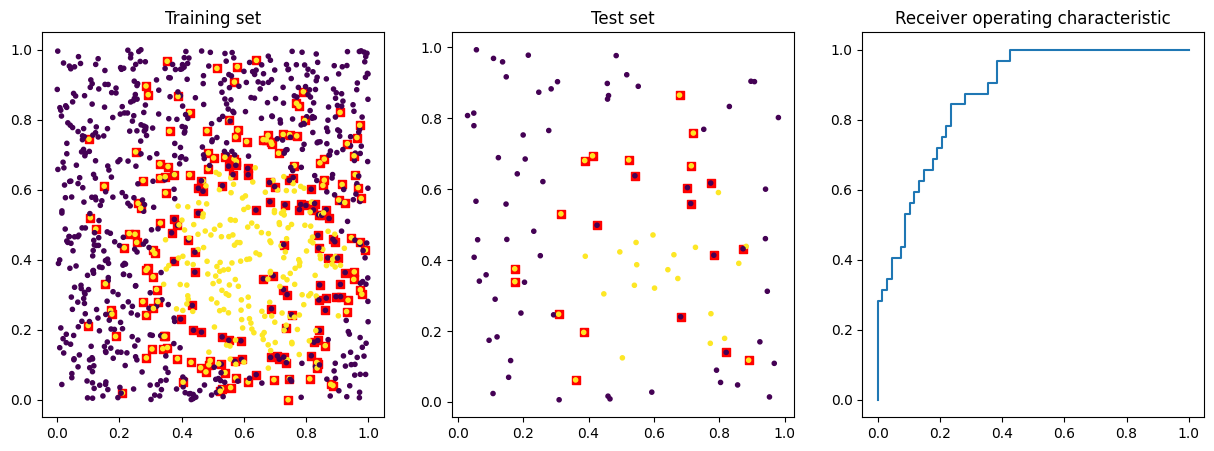

Training data:
Confusion matrix:
 [[676   0]
 [324   0]]
Recall 100.00%, precision 67.60%, f1-measure 80.67%
Test data:
Confusion matrix:
 [[68  0]
 [32  0]]
Recall 100.00%, precision 68.00%, f1-measure 80.95%


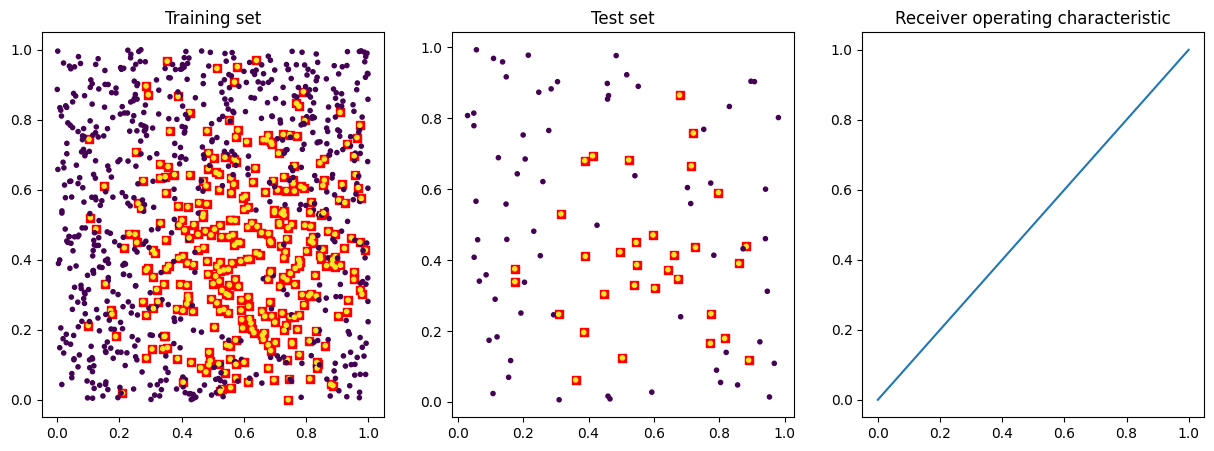

Training data:
Confusion matrix:
 [[595  81]
 [120 204]]
Recall 88.02%, precision 83.22%, f1-measure 85.55%
Test data:
Confusion matrix:
 [[60  8]
 [10 22]]
Recall 88.24%, precision 85.71%, f1-measure 86.96%


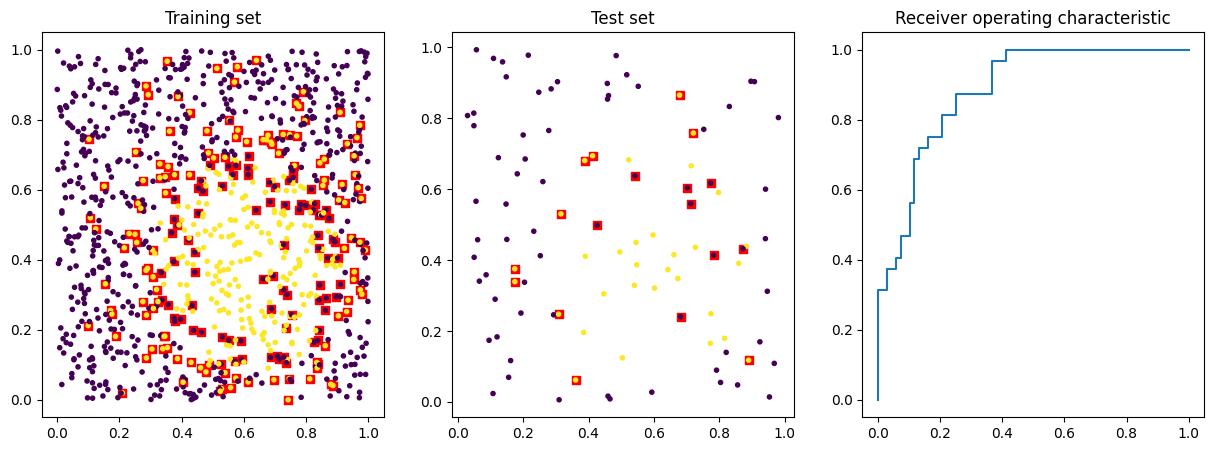

Training data:
Confusion matrix:
 [[599  77]
 [125 199]]
Recall 88.61%, precision 82.73%, f1-measure 85.57%
Test data:
Confusion matrix:
 [[60  8]
 [12 20]]
Recall 88.24%, precision 83.33%, f1-measure 85.71%


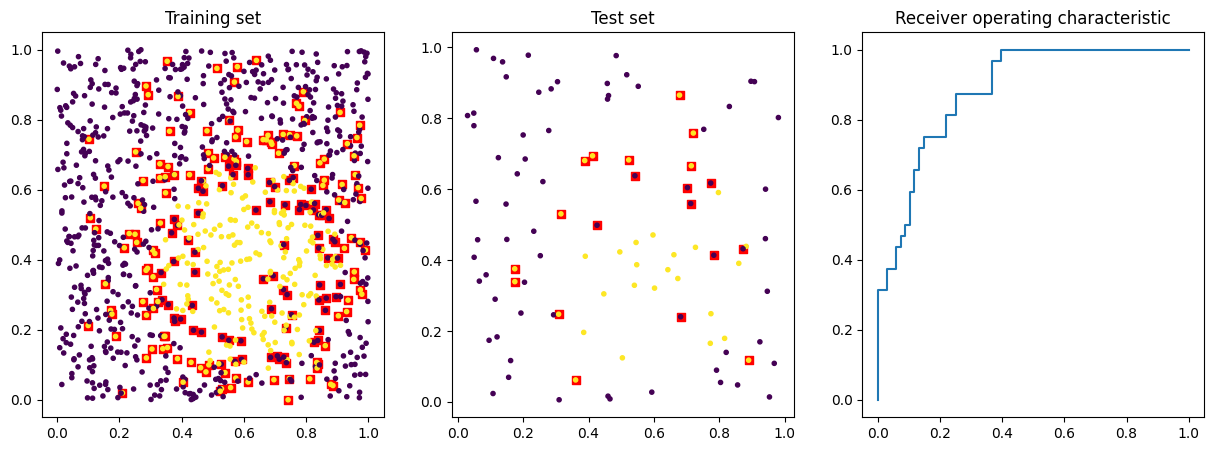

In [6]:
x_train = np.random.rand(1000, problem._center.shape[0])
zero_class_probability = problem.score(x_train)
y_train = np.random.rand(1000)<=zero_class_probability

x_t = np.random.rand(100, problem._center.shape[0])
zero_class_probability = problem.score(x_t)
y_t = np.random.rand(100)<=zero_class_probability

clf = svm.SVC(gamma=1)
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t)

clf = svm.SVC(gamma=0.5)
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t)

clf = svm.SVC(gamma=0)
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t)

clf = svm.SVC(gamma=2)
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t)

clf = svm.SVC(gamma=3)
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t)

Training data:
Confusion matrix:
 [[676   0]
 [324   0]]
Recall 100.00%, precision 67.60%, f1-measure 80.67%
Test data:
Confusion matrix:
 [[68  0]
 [32  0]]
Recall 100.00%, precision 68.00%, f1-measure 80.95%


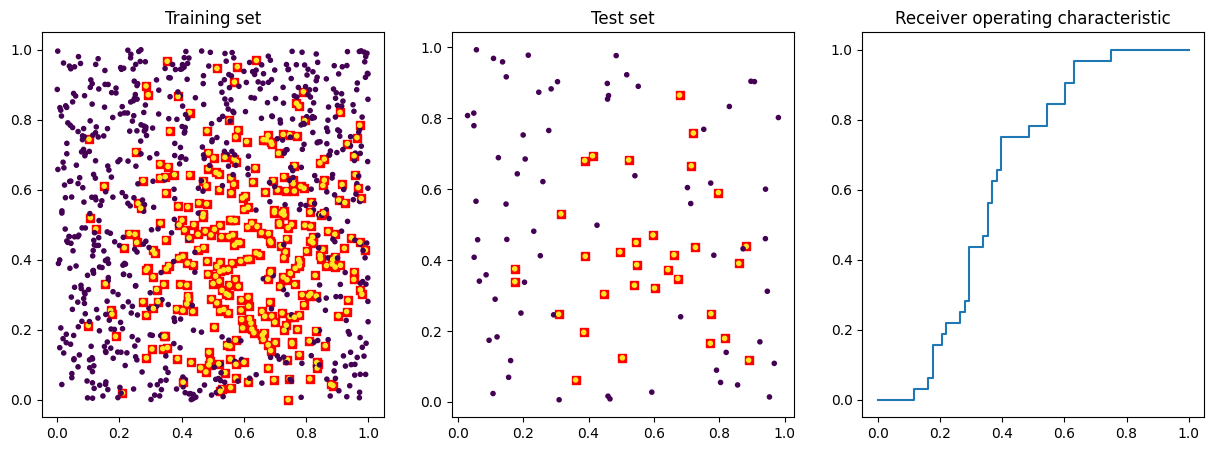

In [7]:
clf = svm.SVC(kernel='linear')
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t)

Training data:
Confusion matrix:
 [[577  99]
 [107 217]]
Recall 85.36%, precision 84.36%, f1-measure 84.85%
Test data:
Confusion matrix:
 [[60  8]
 [ 9 23]]
Recall 88.24%, precision 86.96%, f1-measure 87.59%


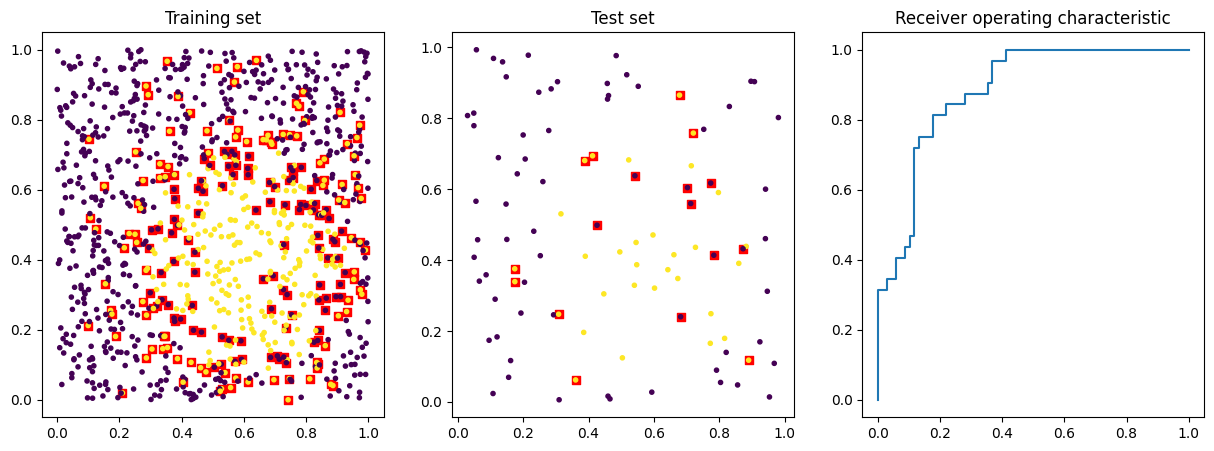

Training data:
Confusion matrix:
 [[592  84]
 [121 203]]
Recall 87.57%, precision 83.03%, f1-measure 85.24%
Test data:
Confusion matrix:
 [[60  8]
 [11 21]]
Recall 88.24%, precision 84.51%, f1-measure 86.33%


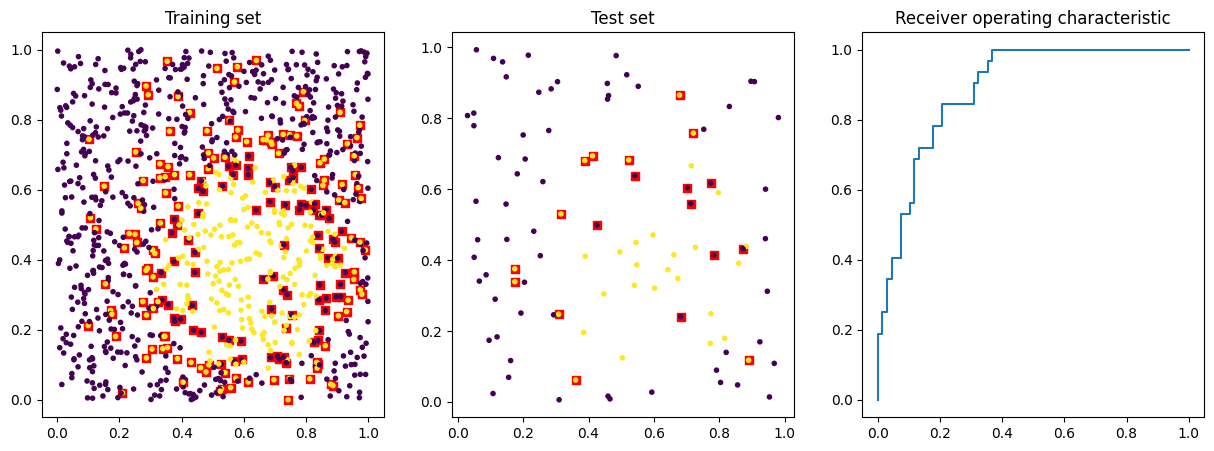

Training data:
Confusion matrix:
 [[607  69]
 [128 196]]
Recall 89.79%, precision 82.59%, f1-measure 86.04%
Test data:
Confusion matrix:
 [[60  8]
 [11 21]]
Recall 88.24%, precision 84.51%, f1-measure 86.33%


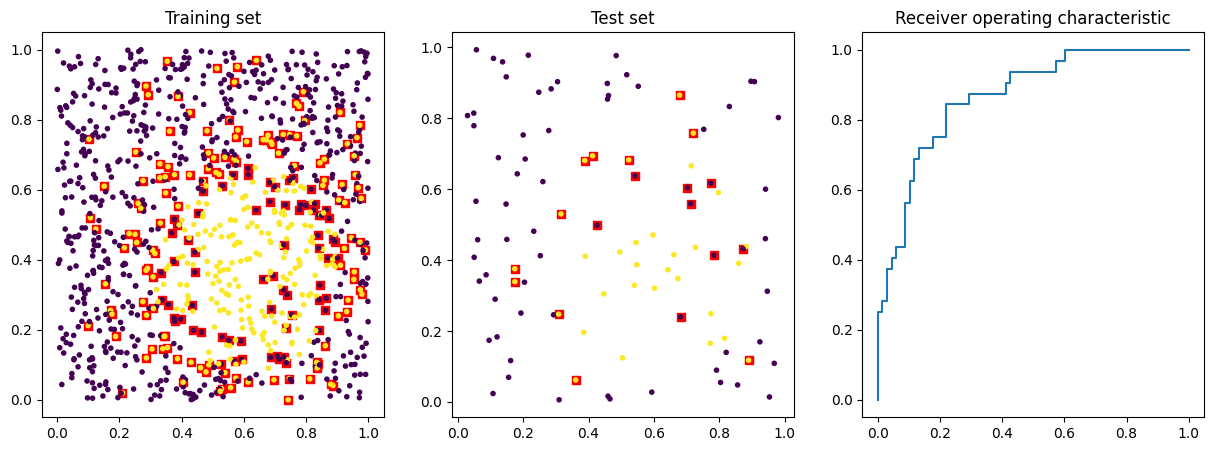

In [8]:
clf = svm.SVC(kernel='poly', degree=2, coef0=1, gamma=10)
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t)
clf = svm.SVC(kernel='poly', degree=3, coef0=1, gamma=10)
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t)
clf = svm.SVC(kernel='poly', degree=5, coef0=1, gamma=10)
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t)

Training data:
Confusion matrix:
 [[582  94]
 [316   8]]
Recall 86.09%, precision 64.81%, f1-measure 73.95%
Test data:
Confusion matrix:
 [[62  6]
 [32  0]]
Recall 91.18%, precision 65.96%, f1-measure 76.54%


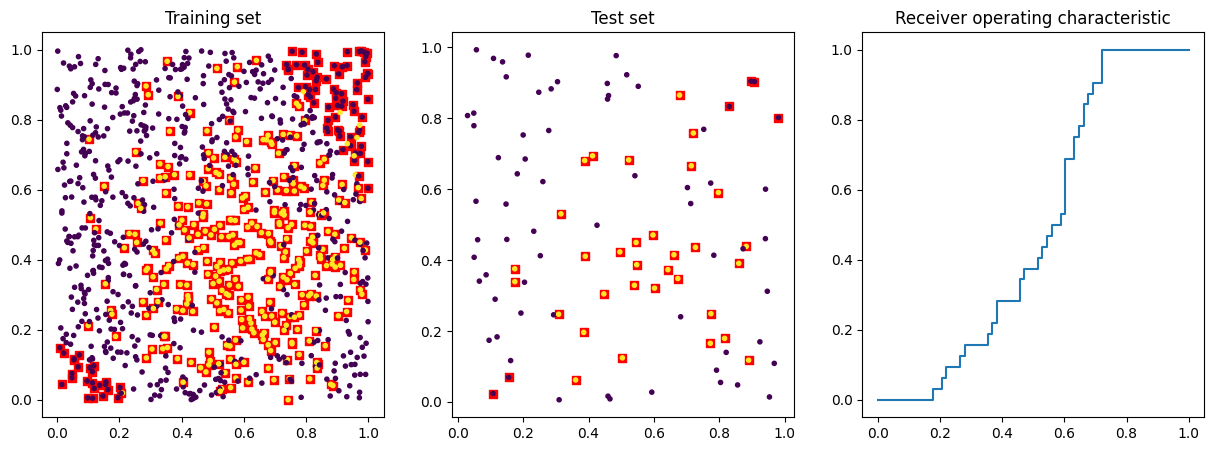

In [9]:
clf = svm.SVC(kernel='sigmoid', gamma=0.5, coef0=0.2)
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t)

## Применение к-ближайших соседей

(1000, 2)
Training data:
Confusion matrix:
 [[614  62]
 [101 223]]
Recall 90.83%, precision 85.87%, f1-measure 88.28%
Test data:
Confusion matrix:
 [[56 12]
 [13 19]]
Recall 82.35%, precision 81.16%, f1-measure 81.75%


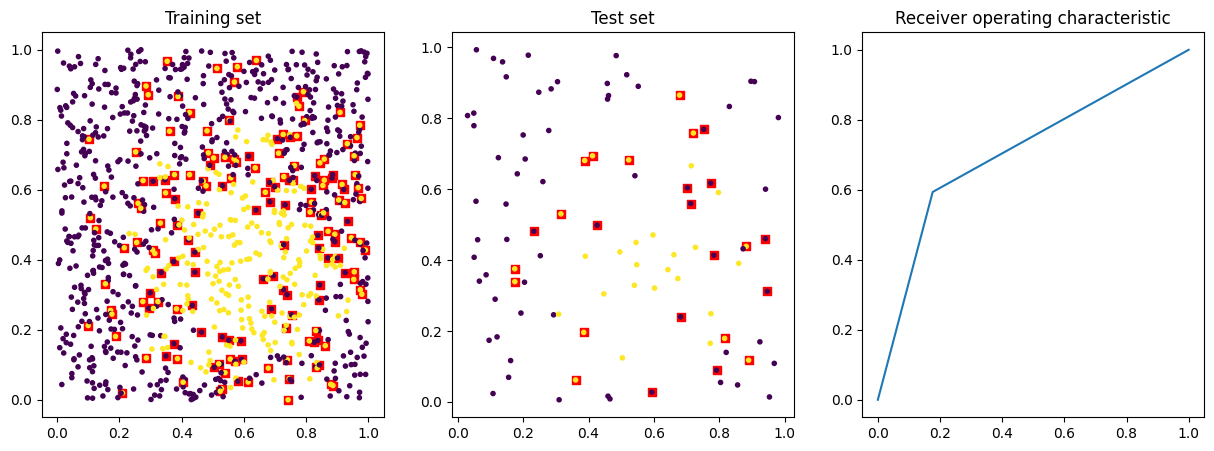

In [10]:
clf = neighbors.KNeighborsClassifier()
print(x_train.shape)
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t, k_mean=True)

Training data:
Confusion matrix:
 [[676   0]
 [  0 324]]
Recall 100.00%, precision 100.00%, f1-measure 100.00%
Test data:
Confusion matrix:
 [[55 13]
 [12 20]]
Recall 80.88%, precision 82.09%, f1-measure 81.48%


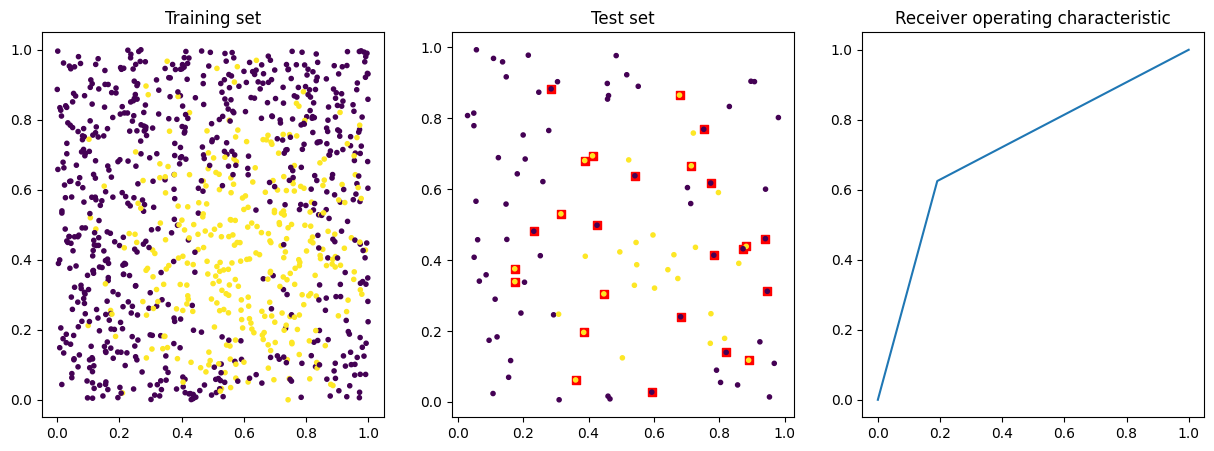

In [11]:
clf = ensemble.RandomForestClassifier()
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t, k_mean=True)

Training data:
Confusion matrix:
 [[592  84]
 [193 131]]
Recall 87.57%, precision 75.41%, f1-measure 81.04%
Test data:
Confusion matrix:
 [[55 13]
 [19 13]]
Recall 80.88%, precision 74.32%, f1-measure 77.46%


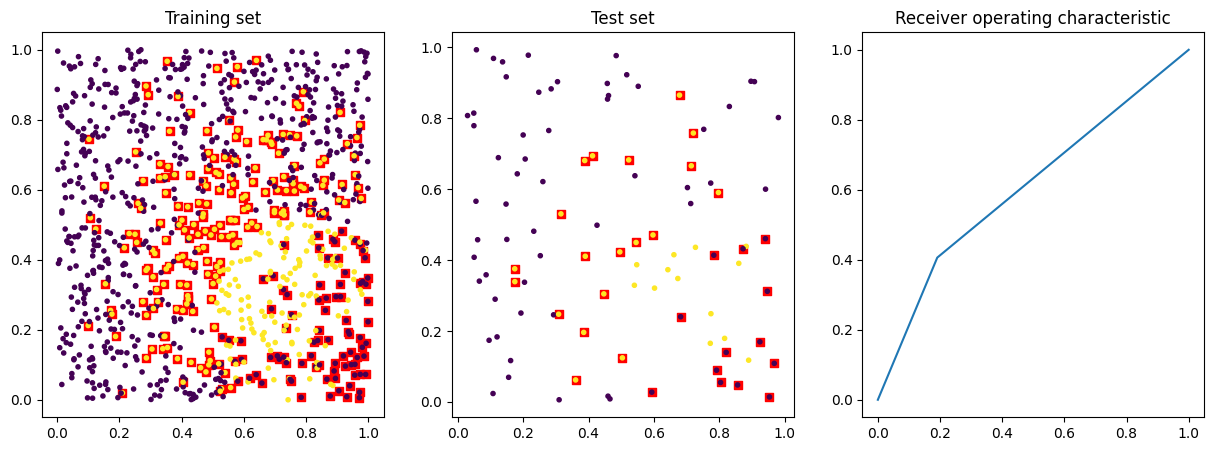

In [12]:
clf = GaussianProcessClassifier()
benchmark_classifier(clf, problem, x_train, y_train, x_t, y_t, k_mean=True)

In [13]:
class FunctionProblem(TestProblem):
    def __init__(self, N: int):
        self._N = np.int32(N)
        assert self._N>0
        self._t = np.linspace(-.5,0.5,self._N)
     
    @property
    def t(self):
        return self._t
    
    def sample_zero_class(self, nitems):
        A = np.random.uniform(-3., 3., size=nitems)[:,None]
        B = np.random.uniform(0., 2*np.pi, size=nitems)[:,None]
        C = np.random.uniform(0., 1., size=nitems)[:,None]
        return A*np.sin(B*self.t[None]+C)
    
    def sample_first_class(self, nitems):
        D = np.random.uniform(-2., 2., size=nitems)[:,None]
        E = np.random.uniform(-2., 2., size=nitems)[:,None]
        return D*self.t[None]+E
    
        
    def sample(self, nitems):
        nitems0 = nitems//2
        nitems1 = nitems - nitems0
        x = np.concatenate((self.sample_zero_class(nitems0), self.sample_first_class(nitems1)), axis=0)
        y = np.concatenate((np.zeros(nitems0), np.ones(nitems1)), axis=0)
        assert x.shape == (nitems, self._N)
        assert y.shape == (nitems,)        
        perm = np.random.permutation(nitems)
        return x[perm], y[perm]

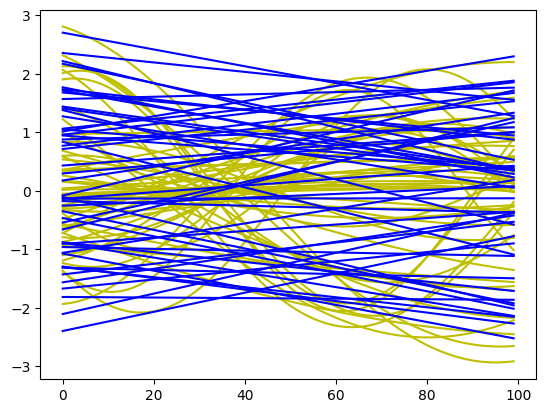

In [14]:
problem = FunctionProblem(N=100)
problem.visualize(100)
plt.show()

In [15]:
num_items = 500
coef_divide = 0.7
x, y = problem.sample(num_items)
x_train = x[:int(num_items*coef_divide)]
y_train = y[:int(num_items*coef_divide)]

x_test = x[int(num_items*coef_divide):]
y_test = y[int(num_items*coef_divide):]

In [16]:
from sklearn.decomposition import PCA
feat_num = x.shape[1]
var_ratio = np.zeros(feat_num)
for num in np.arange(1, feat_num + 1):
    pca = PCA(num)
    pca.fit(x)
    var_ratio[num - 1] = np.sum(pca.explained_variance_ratio_)

In [32]:
print(var_ratio[0:10])

[0.6358225  0.96133425 0.9912042  0.99983657 0.99999035 0.99999993
 1.         1.         1.         1.        ]


Training data:
Confusion matrix:
 [[168   8]
 [  6 168]]
Recall 95.45%, precision 96.55%, f1-measure 96.00%
Test data:
Confusion matrix:
 [[62 12]
 [ 3 73]]
Recall 83.78%, precision 95.38%, f1-measure 89.21%


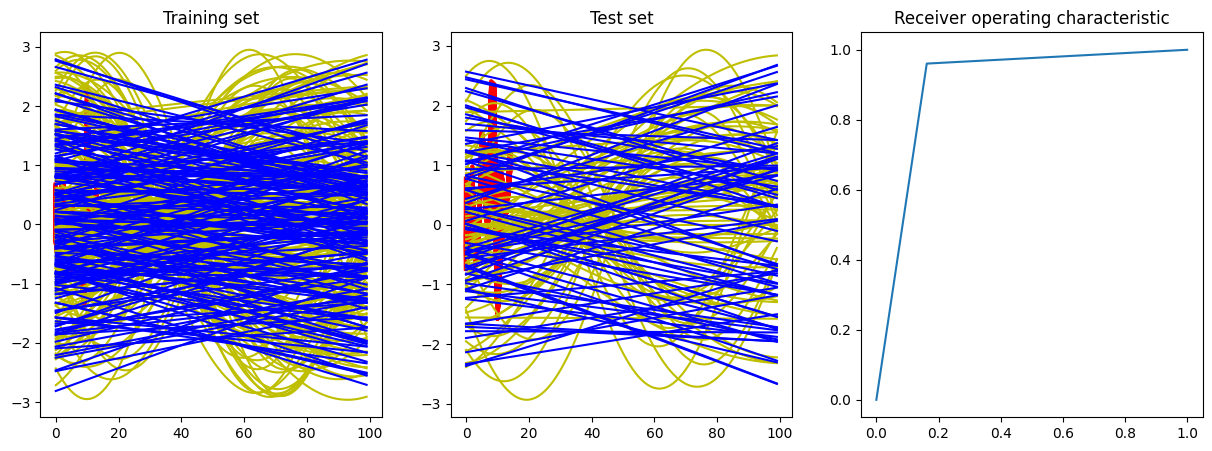

Training data:
Confusion matrix:
 [[165  11]
 [ 18 156]]
Recall 93.75%, precision 90.16%, f1-measure 91.92%
Test data:
Confusion matrix:
 [[63 11]
 [14 62]]
Recall 85.14%, precision 81.82%, f1-measure 83.44%


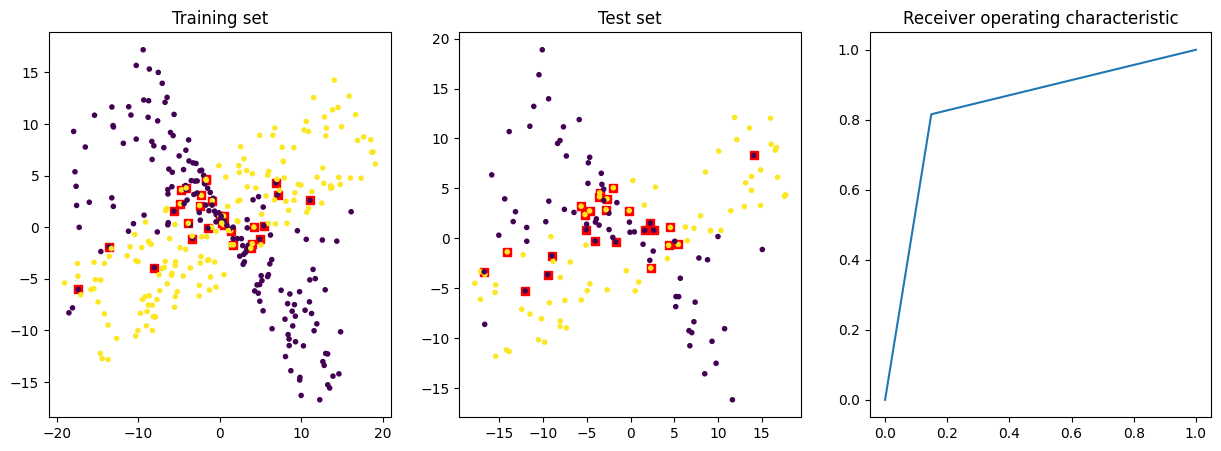

In [27]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

clf = GaussianProcessClassifier()
benchmark_classifier(clf, problem, x_train, y_train, x_test, y_test, k_mean=True)
benchmark_classifier(clf, problem, pca_train, y_train, pca_test, y_test, k_mean=True)

Training data:
Confusion matrix:
 [[168   8]
 [  6 168]]
Recall 95.45%, precision 96.55%, f1-measure 96.00%
Test data:
Confusion matrix:
 [[62 12]
 [ 3 73]]
Recall 83.78%, precision 95.38%, f1-measure 89.21%


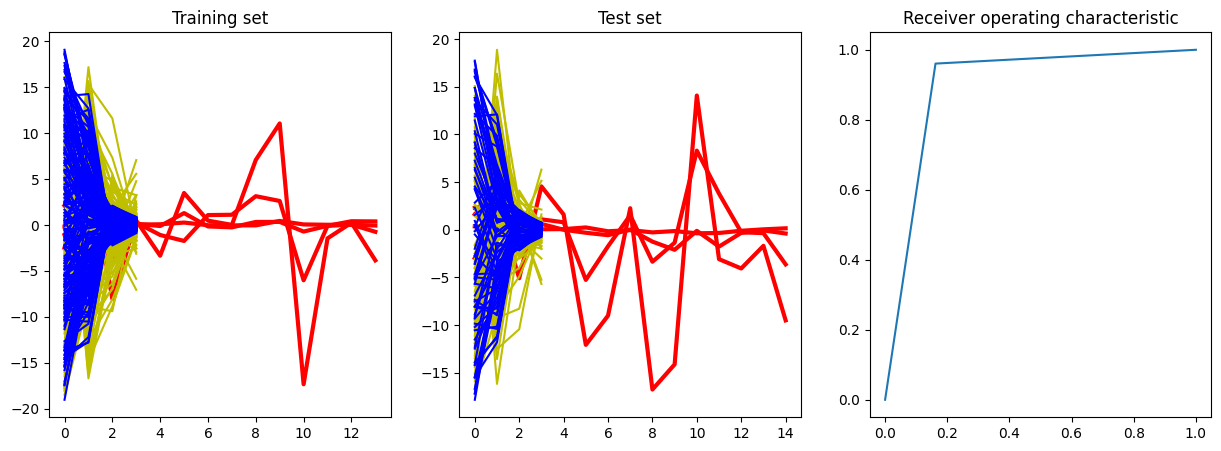

In [35]:
pca = PCA(n_components=4)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)
benchmark_classifier(clf, problem, pca_train, y_train, pca_test, y_test, k_mean=True)

Training data:
Confusion matrix:
 [[120  56]
 [ 72 102]]
Recall 68.18%, precision 62.50%, f1-measure 65.22%
Test data:
Confusion matrix:
 [[35 39]
 [31 45]]
Recall 47.30%, precision 53.03%, f1-measure 50.00%


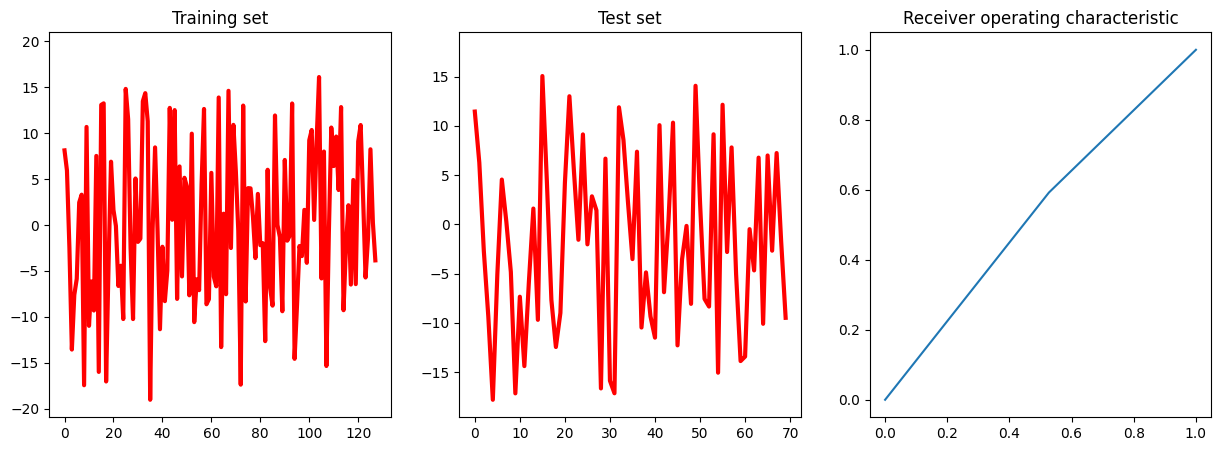

In [37]:
pca = PCA(n_components=1)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)
benchmark_classifier(clf, problem, pca_train, y_train, pca_test, y_test, k_mean=True)